In [271]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime as dt
from datetime import date
import calendar

In [272]:
# Importing NDX data
ndx = yf.download(['NDX'],
                      start='2000-01-01',
                      end='2002-12-31',  
                      progress=True)

[*********************100%***********************]  1 of 1 completed


In [273]:
# Creating DataFrame and rounding numbers

ndx = pd.DataFrame(ndx).round(2)
ndx = ndx.drop(columns='Adj Close')

# Adding % change column, seperating date, reseting index

ndx['Change'] = ((ndx['Close'] - ndx['Open'])/ndx['Open'])*100
ndx['Date'] = ndx.index
ndx = ndx.reset_index(drop=True)

In [ ]:
# Adding weekday for our DataFrame

ndx['Weekday'] = ndx['Date'].dt.weekday

In [275]:
ndx.tail()

Open     High      Low    Close      Volume    Change       Date  \
747  1012.46  1035.49  1010.84  1032.30  1193060000  1.959584 2002-12-23   
748  1026.57  1034.19  1023.06  1023.29   523880000 -0.319511 2002-12-24   
749  1026.44  1041.49  1013.30  1016.46   812310000 -0.972293 2002-12-26   
750  1012.34  1018.16   996.10   997.85   804960000 -1.431337 2002-12-27   
751   999.39  1003.31   980.74   989.89  1076580000 -0.950580 2002-12-30   

     Weekday  
747        0  
748        1  
749        3  
750        4  
751        0

Text(0.5, 0, 'Date')

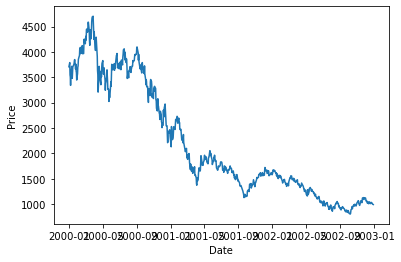

In [276]:
# Creating a chart

plt.plot(ndx['Date'],ndx['Close'])
plt.ylabel('Price')
plt.xlabel('Date')

In [277]:
volatility_days = ndx[abs(ndx['Change'])>=2]
volatility_days

Open     High      Low    Close      Volume    Change       Date  \
2    3766.57  3766.57  3542.73  3546.20  1511840000 -5.850681 2000-01-04   
4    3488.31  3513.55  3334.02  3340.81  1598320000 -4.228409 2000-01-06   
5    3337.26  3529.75  3314.75  3529.60  1634930000  5.763411 2000-01-07   
6    3558.21  3756.17  3558.21  3717.41  1691710000  4.474160 2000-01-10   
7    3715.22  3717.17  3517.79  3544.35  1694460000 -4.599189 2000-01-11   
..       ...      ...      ...      ...         ...       ...        ...   
735  1085.02  1085.63  1052.08  1053.06  1462340000 -2.945568 2002-12-05   
736  1038.72  1074.01  1035.55  1065.97  1529800000  2.623421 2002-12-06   
737  1054.87  1055.36  1014.80  1014.84  1496820000 -3.794780 2002-12-09   
741  1027.66  1027.66  1005.85  1005.85  1371410000 -2.122297 2002-12-13   
742  1011.89  1042.84  1008.52  1042.44  1406210000  3.019103 2002-12-16   

     Weekday  
2          1  
4          3  
5          4  
6          0  
7          1  
..       ...  
735        3  
736        4  
737        0  
741        4  
742        0  

[367 rows x 8 columns]

In [278]:
# Creating for loop to count number of up days in defined percenege change 

up_days = pd.DataFrame(columns=['0','1','2','3','4'])
for column in up_days:
    for i in range(6):
       up_days.loc[i, column] =  (ndx.Date[(ndx.Weekday == int(column)) & (ndx.Change>=i) & (ndx.Change<i+1)].count())

In [279]:
new_columns = ["Monday","Tuesday","Wedneesday","Thursday","Friday"]
up_days.index.name = "Equal or higher gains %"
up_days.columns = new_columns

In [280]:
up_days

Monday Tuesday Wedneesday Thursday Friday
Equal or higher gains %                                          
0                           19      19         25       20     32
1                           16      12         19       20     17
2                           12       8          9       14     12
3                           14      13          7       13      8
4                            3       4          6        7      4
5                            0       3          4        6      3

In [281]:
# Creating for loop to count number of down days in defined percenege change 

down_days = pd.DataFrame(columns=['0','1','2','3','4'])
for column in down_days:
    for i in range(6):
       down_days.loc[i, column] =  (ndx.Date[(ndx.Weekday == int(column)) & (ndx.Change<=-i) & (ndx.Change>-i-1)].count())

In [282]:
down_days.columns = new_columns
down_days.index.name = "Equal or lower %"
down_days

Monday Tuesday Wedneesday Thursday Friday
Equal or lower %                                          
0                    21      24         13       16     24
1                    16      14         23       16     19
2                    14      20         18       21     12
3                    16      12         13        9     10
4                     7      11          5        6      5
5                     1       5          1        1      3

In [ ]:
# Count how much price rised after trend day up and after trend day down.